In [2]:
import numpy as np
import pandas as pd
import os
import json

In [23]:
with open('aiinent.json') as json_file:
    data = json.load(json_file)
    
print("%.1000s" % data)

{'info': {'year': '2020', 'version': '3', 'description': 'Exported from roboflow.ai', 'contributor': 'Roboflow', 'url': 'https://public.roboflow.ai/object-detection/self-driving-car', 'date_created': '2020-03-10T12:15:29+00:00'}, 'licenses': [{'id': 1, 'url': 'https://choosealicense.com/licenses/mit/', 'name': 'MIT'}], 'categories': [{'id': 0, 'name': 'obstacles', 'supercategory': 'none'}, {'id': 1, 'name': 'biker', 'supercategory': 'obstacles'}, {'id': 2, 'name': 'car', 'supercategory': 'obstacles'}, {'id': 3, 'name': 'pedestrian', 'supercategory': 'obstacles'}, {'id': 4, 'name': 'trafficLight', 'supercategory': 'obstacles'}, {'id': 5, 'name': 'trafficLight-Green', 'supercategory': 'obstacles'}, {'id': 6, 'name': 'trafficLight-GreenLeft', 'supercategory': 'obstacles'}, {'id': 7, 'name': 'trafficLight-Red', 'supercategory': 'obstacles'}, {'id': 8, 'name': 'trafficLight-RedLeft', 'supercategory': 'obstacles'}, {'id': 9, 'name': 'trafficLight-Yellow', 'supercategory': 'obstacles'}, {'id'

In [4]:
categories = data['categories']
images = data['images']
annotations = data['annotations']

print(annotations[1])
print(images[0])
# print(categories)
print(len(annotations))

{'id': 1, 'image_id': 0, 'category_id': 2, 'bbox': [174, 248, 32, 40.10666666666667], 'area': 1283.4133333333334, 'segmentation': [], 'iscrowd': 0}
{'id': 0, 'license': 1, 'file_name': '1478898964443478170_jpg.rf.0032b18b04e80a46564f82da1c1a710c.jpg', 'height': 512, 'width': 512, 'date_captured': '2020-03-10T12:15:29+00:00'}
97942


# Dictionary for Categories

In [5]:
category_mapping = {}

for category_item in categories:
    category_mapping[category_item['id']] = category_item['name']

In [6]:
category_mapping

{0: 'obstacles',
 1: 'biker',
 2: 'car',
 3: 'pedestrian',
 4: 'trafficLight',
 5: 'trafficLight-Green',
 6: 'trafficLight-GreenLeft',
 7: 'trafficLight-Red',
 8: 'trafficLight-RedLeft',
 9: 'trafficLight-Yellow',
 10: 'trafficLight-YellowLeft',
 11: 'truck'}

# Add Image Path to Annotations

In [10]:
id_to_path_mapping = {}

for image_item in images:
    id_to_path_mapping[image_item['id']] = image_item['file_name']
    
for annotation in annotations:
    annotation['image_path'] = id_to_path_mapping[annotation['image_id']]
    annotation['cat'] = category_mapping[annotation['category_id']]
    annotation['bbox'] = list(map(int,annotation['bbox']))
    
print(annotations[0:9])

[{'id': 0, 'image_id': 0, 'category_id': 2, 'bbox': [107, 255, 58, 58], 'area': 3454.2933333333335, 'segmentation': [], 'iscrowd': 0, 'image_path': '1478898964443478170_jpg.rf.0032b18b04e80a46564f82da1c1a710c.jpg', 'cat': 'car'}, {'id': 1, 'image_id': 0, 'category_id': 2, 'bbox': [174, 248, 32, 40], 'area': 1283.4133333333334, 'segmentation': [], 'iscrowd': 0, 'image_path': '1478898964443478170_jpg.rf.0032b18b04e80a46564f82da1c1a710c.jpg', 'cat': 'car'}, {'id': 2, 'image_id': 0, 'category_id': 2, 'bbox': [202, 253, 14, 24], 'area': 369.55022222222226, 'segmentation': [], 'iscrowd': 0, 'image_path': '1478898964443478170_jpg.rf.0032b18b04e80a46564f82da1c1a710c.jpg', 'cat': 'car'}, {'id': 3, 'image_id': 0, 'category_id': 2, 'bbox': [203, 251, 13, 25], 'area': 354.9866666666667, 'segmentation': [], 'iscrowd': 0, 'image_path': '1478898964443478170_jpg.rf.0032b18b04e80a46564f82da1c1a710c.jpg', 'cat': 'car'}, {'id': 4, 'image_id': 0, 'category_id': 2, 'bbox': [218, 248, 27, 34], 'area': 928.4

In [11]:
from matplotlib import pyplot as plt
import cv2

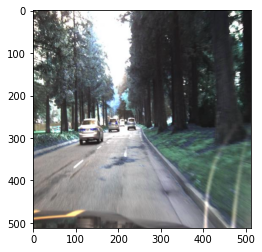

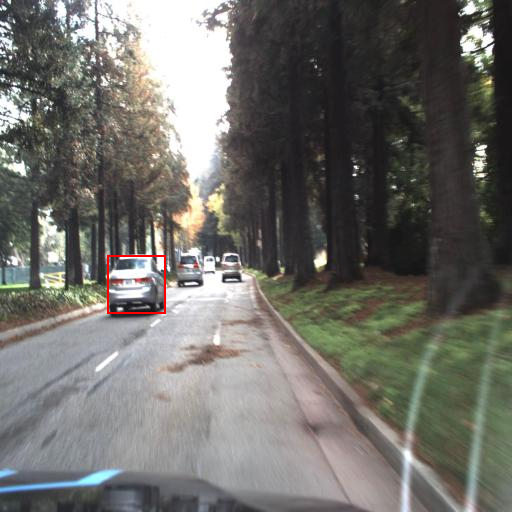

In [14]:
annotation = annotations[0]
coordinate = annotation['bbox']

im = cv2.imread('1478898964443478170_jpg.rf.0032b18b04e80a46564f82da1c1a710c.jpg')
plt.imshow(im)
plt.show()

from PIL import Image, ImageFont, ImageDraw

img = Image.open(annotation['image_path'])
img1 = ImageDraw.Draw(img)
img1.rectangle(((coordinate[0], coordinate[1]),(coordinate[0]+coordinate[2], coordinate[1]+coordinate[3])),  outline ="red",width=2)
display(img)

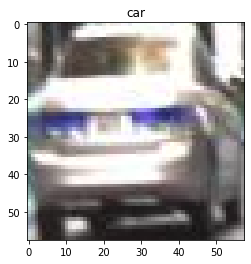

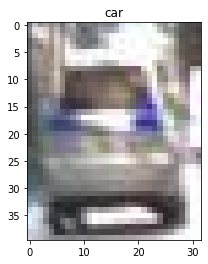

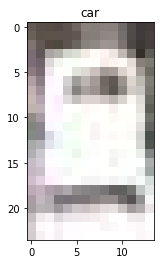

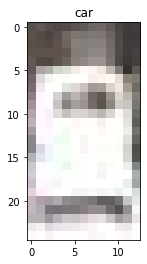

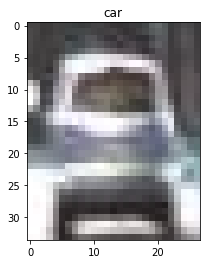

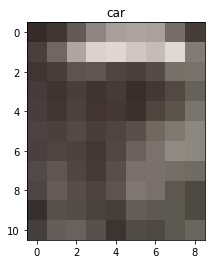

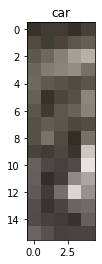

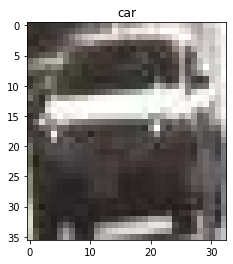

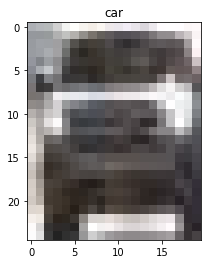

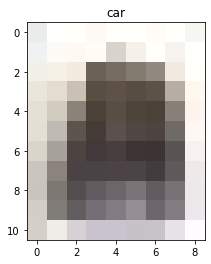

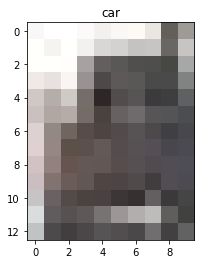

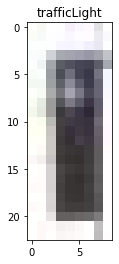

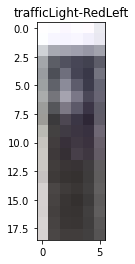

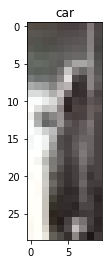

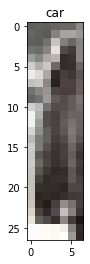

In [15]:
max_images = 15

for annotation in annotations[:max_images]:
    coordinate = annotation['bbox']
    
    x = coordinate[0]
    y = coordinate[1]
    width = coordinate[2]
    height = coordinate[3]

    im = cv2.imread(annotation['image_path'])
    image = im[y:y+height,x:x+width]

    img = Image.open(annotation['image_path'])
    img1 = ImageDraw.Draw(img)
    img1.rectangle(((coordinate[0], coordinate[1]),(coordinate[0]+coordinate[2], coordinate[1]+coordinate[3])),  outline ="red",width=2)

    resized_image = cv2.resize(image, (128, 128), interpolation = cv2.INTER_NEAREST) 
    #resized_image = cv2.resize(image, (224, 224), interpolation = cv2.INTER_NEAREST) 
    #resized_image = cv2.resize(image, (64, 64), interpolation = cv2.INTER_NEAREST) 
    plt.imshow(image)
    plt.title(annotation['cat'])
    plt.show()

# Training a Simple CNN

In [16]:
from matplotlib import pyplot as plt
from PIL import Image, ImageFont, ImageDraw
    
import numpy as np
import cv2
import keras

#, original_shape, new_shape=(224,224)

def get_cropped_image(img, bbox):
    start_x, start_y, width, height = bbox
    cropped_img = img[start_y:start_y+height, start_x:start_x+width]
    return cropped_img
      
def get_reshaped_image(img, new_shape=(128,128)):
    resized_image = cv2.resize(img, new_shape, interpolation = cv2.INTER_NEAREST) 
    return resized_image

def rescale_bbox(bbox, current_img_shape, new_img_shape=(128,128)):
    x_ratio = new_img_shape[0] / current_img_shape[0]
    y_ratio = new_img_shape[1] / current_img_shape[1]
    
    new_x = bbox[0] * x_ratio
    new_y = bbox[1] * y_ratio
    new_width = bbox[2] * x_ratio
    new_height = bbox[3] * y_ratio
    
    return new_x, new_y, new_width, new_height
   

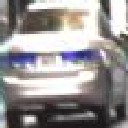

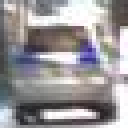

In [17]:
# Temporary Test
max_images = 2
title_distance = 10

for annotation in annotations[:max_images]:
    bbox = annotation['bbox']
    
    im = cv2.imread(annotation['image_path'])
    img = Image.open(annotation['image_path'])
    img2 = np.asarray(image)
    
    x,y,w,h = rescale_bbox(bbox, (img2.shape[0],img2.shape[1]))
    cropped_image = get_cropped_image(im, bbox)
    reshaped_image = get_reshaped_image(cropped_image)

    img = Image.fromarray(reshaped_image)
    img3 = ImageDraw.Draw(img)
    img3.rectangle(((x, y),(x+w, y+h)),  outline ="green",width=1)
    display(img)

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style()

# to divide our data into train and validation set
from sklearn.model_selection import train_test_split
#to encode our labels
from tensorflow.keras.utils import to_categorical
#to build our model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
# Our optimizer options
from keras.optimizers import RMSprop
from keras.optimizers import Adam
#Callback options
from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
#importing image data generator for data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#for the final prediction report
from sklearn.metrics import classification_report ,confusion_matrix

In [19]:
new_categories = [x['name'] for x in categories]
print(new_categories)
encoded_categories = to_categorical(list(range(len(new_categories))), num_classes=len(new_categories))
print(encoded_categories)

category_mapping = {x:encoded_categories[i] for i,x in enumerate(new_categories)}
print(category_mapping)

['obstacles', 'biker', 'car', 'pedestrian', 'trafficLight', 'trafficLight-Green', 'trafficLight-GreenLeft', 'trafficLight-Red', 'trafficLight-RedLeft', 'trafficLight-Yellow', 'trafficLight-YellowLeft', 'truck']
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
{'obstacles': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 'biker': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 'car': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 'pedestrian': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtyp

In [27]:
import cv2
import traceback
import sys


def transform_data(annotations, base_dir, samples_per_cat=None, cats=None):
    features = []
    labels = []
    max_check = False
    cat_count = {}
    
    if samples_per_cat is not None:
        max_check = True
        cat_count = {x:0 for x in cats}
    else:
        samples_per_cat = sys.maxsize
        
    
    for i, annotation in enumerate(annotations):
        img_path = annotation['image_path']
        cat = annotation['cat']
        bbox = annotation['bbox']

        try:
            if max_check:
                if cat in cats:
                    if cat_count[cat] >= samples_per_cat:
                        continue
                else:
                    continue

            img = cv2.imread(img_path)

            if img is None:
                continue
            
            #x,y,w,h = rescale_bbox(bbox, (img.shape[0],img.shape[1]))
            cropped_image = get_cropped_image(img, bbox)
            resized_image = get_reshaped_image(cropped_image, new_shape=(128,128))

            features.append(resized_image)
            labels.append(category_mapping[cat])

            cat_count[cat] += 1
            
            if i != 0 and i % 1000 == 0:
                print("Processed Images: ",i)

            #print(resized_image.shape)

            #plt.imshow(resized_image)
            #plt.title(cat)
            #plt.show()
        except:
            print(f"Error in image: bbox={bbox}, img_path={img_path}, cat={cat}")
            traceback.print_exc()
        
    return features, labels
    
    
max_samples = 10000
cats = set(new_categories)
    
features, labels = transform_data(annotations, r'..',samples_per_cat=max_samples, cats=cats)

print(len(features))
print(len(labels))

print(annotations[0])
print(labels[0])

#features, labels = transform_data(annotations, r'../input/til2020/val/val/',samples_per_cat=max_samples, cats=cats)
    
#print(len(test_features))
#print(len(test_labels))
    

Processed Images:  23000
Processed Images:  90000
1904
1904
{'id': 0, 'image_id': 0, 'category_id': 2, 'bbox': [107, 255, 58, 58], 'area': 3454.2933333333335, 'segmentation': [], 'iscrowd': 0, 'image_path': '1478898964443478170_jpg.rf.0032b18b04e80a46564f82da1c1a710c.jpg', 'cat': 'car'}
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [30]:
features_2 = np.asarray(features)
print(features_2.shape)
labels_2 = np.asarray(labels)
print(labels_2.shape)

(1904, 128, 128, 3)
(1904, 12)


In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_2, labels_2, test_size=0.2, random_state=1)

In [36]:
input_shape = (128, 128, 3)
epoch = 20

model = Sequential()

model.add(Conv2D(64, kernel_size=(5,5), input_shape=input_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(category_mapping), activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

early_stop= EarlyStopping(monitor='val_loss',patience=10)

model.fit(x_train, y_train,
          epochs=epoch,
          validation_data=(x_test,y_test), 
          callbacks=[early_stop])

Epoch 1/20
48/48 [==============================] - 29s 600ms/step - loss: 6.2180 - accuracy: 0.4859 - val_loss: 1.9713 - val_accuracy: 0.5696
Epoch 2/20
48/48 [==============================] - 29s 614ms/step - loss: 1.3572 - accuracy: 0.6198 - val_loss: 1.6773 - val_accuracy: 0.6693
Epoch 3/20
48/48 [==============================] - 32s 670ms/step - loss: 1.2140 - accuracy: 0.6467 - val_loss: 1.4494 - val_accuracy: 0.7113
Epoch 4/20
48/48 [==============================] - 32s 657ms/step - loss: 1.1125 - accuracy: 0.6612 - val_loss: 1.1853 - val_accuracy: 0.7218
Epoch 5/20
48/48 [==============================] - 31s 651ms/step - loss: 1.0106 - accuracy: 0.6829 - val_loss: 1.2697 - val_accuracy: 0.7428
Epoch 6/20
48/48 [==============================] - 33s 687ms/step - loss: 0.9649 - accuracy: 0.6940 - val_loss: 1.0567 - val_accuracy: 0.7297
Epoch 7/20
48/48 [==============================] - 32s 662ms/step - loss: 0.9188 - accuracy: 0.7157 - val_loss: 1.0585 - val_accuracy: 0.7428

In [38]:
model.save('my_model')

In [42]:
import tensorflow as tf
from tensorflow import keras

In [41]:
new_model = tf.keras.models.load_model('my_model')

# Check its architecture
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 124, 124, 64)      4864      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)       

In [43]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.inception_v3 import preprocess_input
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [65]:
name ='1478901527820110674_jpg.rf.e92bf2d92d8049a3a8116fd9bc93d336.jpg'
image = load_img(name, target_size = (128, 128))
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)

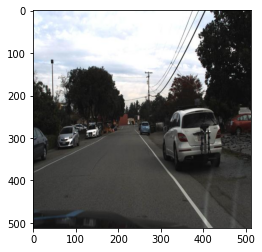

In [64]:
img1 = mpimg.imread(name)
imgplot = plt.imshow(img1)
plt.show()

In [59]:
yhat = model.predict(image)
yhat
#label = decode_predictions(yhat)
#label = label[0][0]
#print(label[1])
#print(label[2])
#print('%s (%.2f%%)' % (label[1], label[2]*100))

array([[0.00197952, 0.11975715, 0.16220048, 0.13097498, 0.06890698,
        0.07169285, 0.01955235, 0.20977284, 0.12795562, 0.04664573,
        0.00502231, 0.03553918]], dtype=float32)

In [74]:
from imageai.Detection import ObjectDetection
import os

execution_path = os.getcwd()

detector = ObjectDetection()
detector.setModelTypeAsRetinaNet()
detector.setModelPath( os.path.join(execution_path , "resnet50_coco_best_v2.1.0.h5"))
detector.loadModel()
detections = detector.detectObjectsFromImage(input_image=os.path.join(execution_path , name), output_image_path=os.path.join(execution_path , name+"objdet.jpg"))

for eachObject in detections:
    print(eachObject["name"] , " : " , eachObject["percentage_probability"] )

car  :  95.55057883262634
car  :  90.1602029800415
car  :  78.80691289901733
car  :  75.38107633590698
car  :  75.08103847503662
car  :  63.88738751411438
car  :  57.89066553115845


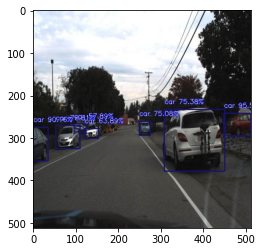

In [75]:
img1 = mpimg.imread(name+"objdet.jpg")
imgplot = plt.imshow(img1)
plt.show()